# ML Tutorial-02: Dimensionality Reduction and Model Evaluation with the Iris Dataset

## Overview
Objective: Gain hands-on experience with PCA and LDA dimensionality reduction techniques and evaluate their effects on machine learning model performance using the Iris dataset.

1. Data Preparation:

  • Load the Iris dataset (sklearn.datasets.load_iris).

  • Split into 70% training and 30% testing sets (train_test_split).

  • Standardize features using StandardScaler.
2. Model Training & Evaluation (No Dimensionality Reduction): Train and evaluate the following
models on the standardized dataset:
  
  • Logistic Regression
  
  • Decision Tree
  
  • Random Forest
  
  • Support Vector Machine (SVM)

  Evaluation Metrics:

  • Accuracy
  
  • Precision
  
  • Recall
  
  • F1-Score
  
  • Confusion Matrix

3. Dimensionality Reduction with PCA:

  • Apply PCA(n_components=2) on training data.
  
  • Transform both training and test data.
  
  • Train the same models listed in section 2.
  
  • Evaluate using the same metrics.

4. Dimensionality Reduction with LDA:
  
  • Apply LinearDiscriminantAnalysis(n_components=2) on training data.
  
  • Transform both training and test data.
  
  • Train and evaluate the same models using the same metrics.

5. Comparison and Analysis:
  • Compare model performance across three scenarios:
    o Without dimensionality reduction
    o With PCA
    o With LDA
  
  • Analyze the effect of dimensionality reduction on each metric.
  
  • Provide observations and insights on model behavior and dimensionality impact

In [10]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style for better plots
sns.set(style='whitegrid')

## 1. Data Preparation

We load the Iris dataset and then split it into training (70%) and testing (30%) sets. Afterwards, we standardize the features.

In [11]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print(f"Training samples: {X_train_std.shape[0]}, Testing samples: {X_test_std.shape[0]}")

Training samples: 105, Testing samples: 45


## 2. Model Training & Evaluation without Dimensionality Reduction

### Models Considered:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

We use the following evaluation metrics:

- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

### Evaluation without Dimensionality Reduction ###

Logistic Regression:
Accuracy: 0.911
Precision: 0.916
Recall: 0.911
F1-Score: 0.911


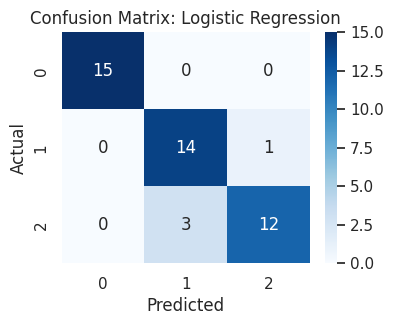


Decision Tree:
Accuracy: 0.911
Precision: 0.916
Recall: 0.911
F1-Score: 0.911


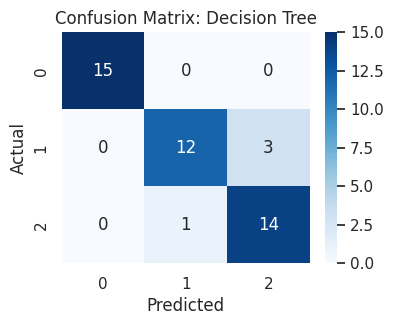


Random Forest:
Accuracy: 0.889
Precision: 0.898
Recall: 0.889
F1-Score: 0.888


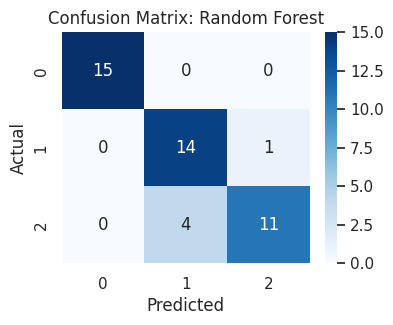


SVM:
Accuracy: 0.933
Precision: 0.935
Recall: 0.933
F1-Score: 0.933


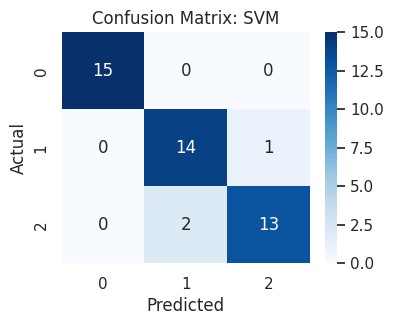

In [12]:
# Define a function to train and evaluate models
def train_evaluate(model, X_tr, X_te, y_tr, y_te, model_name=""):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_te, y_pred, average='weighted')
    f1 = f1_score(y_te, y_pred, average='weighted')

    print(f"\n{model_name}:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-Score: {f1:.3f}")

    cm = confusion_matrix(y_te, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return acc, prec, rec, f1

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Training and evaluation
results_baseline = {}
print("### Evaluation without Dimensionality Reduction ###")
for name, model in models.items():
    results_baseline[name] = train_evaluate(model, X_train_std, X_test_std, y_train, y_test, model_name=name)

## 3. Dimensionality Reduction with PCA

We now apply PCA to reduce the feature space to 2 principal components. Then, we train and evaluate the same models on the PCA-transformed data.

Original shape: (105, 4) -> PCA shape: (105, 2)
### Evaluation with PCA (2 components) ###

Logistic Regression:
Accuracy: 0.889
Precision: 0.898
Recall: 0.889
F1-Score: 0.888


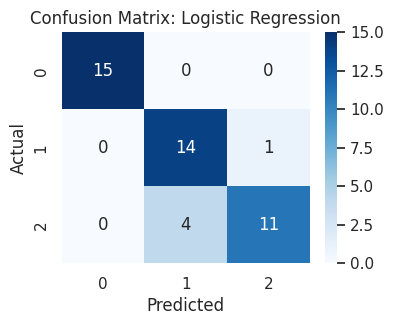


Decision Tree:
Accuracy: 0.911
Precision: 0.916
Recall: 0.911
F1-Score: 0.911


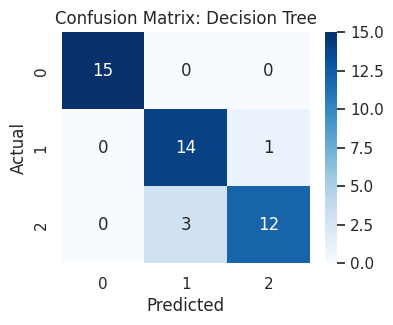


Random Forest:
Accuracy: 0.933
Precision: 0.935
Recall: 0.933
F1-Score: 0.933


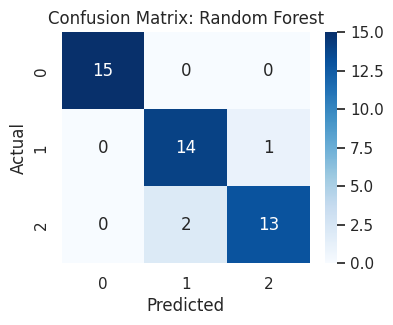


SVM:
Accuracy: 0.911
Precision: 0.916
Recall: 0.911
F1-Score: 0.911


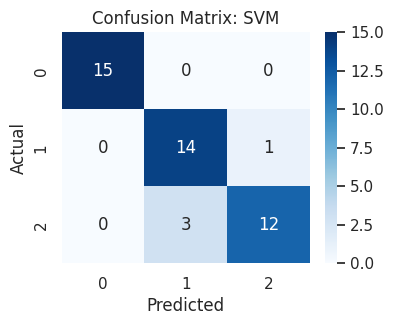

In [13]:
# Apply PCA with n_components=2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(f"Original shape: {X_train_std.shape} -> PCA shape: {X_train_pca.shape}")

# Train and evaluate models on PCA-reduced data
results_pca = {}
print("### Evaluation with PCA (2 components) ###")
for name, model in models.items():
    results_pca[name] = train_evaluate(model, X_train_pca, X_test_pca, y_train, y_test, model_name=name)

## 4. Dimensionality Reduction with LDA

In this section, we apply Linear Discriminant Analysis (LDA) to reduce the dataset to 2 dimensions.
Now, we apply LDA on the standardized data and evaluate the models.

Original shape: (105, 4) -> LDA shape: (105, 2)
### Evaluation with LDA (2 components) ###

Logistic Regression:
Accuracy: 0.978
Precision: 0.979
Recall: 0.978
F1-Score: 0.978


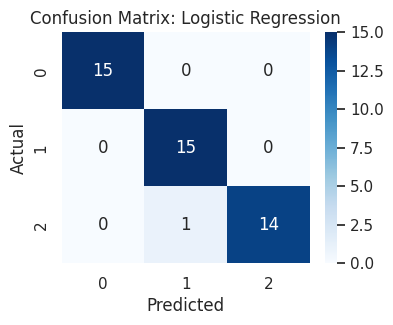


Decision Tree:
Accuracy: 0.978
Precision: 0.979
Recall: 0.978
F1-Score: 0.978


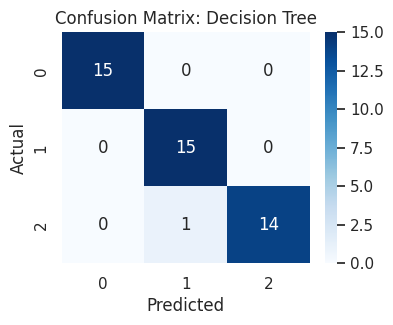


Random Forest:
Accuracy: 0.978
Precision: 0.979
Recall: 0.978
F1-Score: 0.978


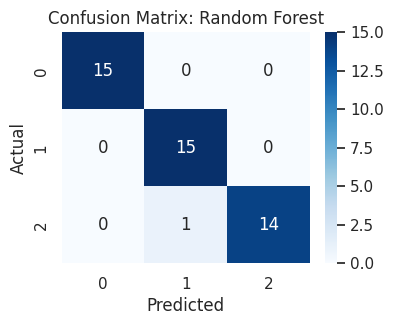


SVM:
Accuracy: 0.978
Precision: 0.979
Recall: 0.978
F1-Score: 0.978


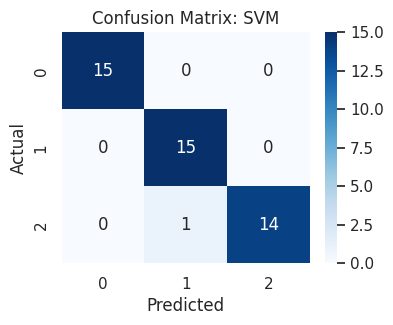

In [14]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

print(f"Original shape: {X_train_std.shape} -> LDA shape: {X_train_lda.shape}")

# Training and evaluation
results_lda = {}
print("### Evaluation with LDA (2 components) ###")
for name, model in models.items():
    results_lda[name] = train_evaluate(model, X_train_lda, X_test_lda, y_train, y_test, model_name=name)

## 5. Comparison and Analysis

The results from all three scenarios are summarized. The metrics across the baseline, PCA, and LDA cases are compared. This analysis helps to understand the effect of reducing dimensions on the performance of different classifiers.

- **Without Reduction:** In this scenario, the models use every available feature. This often results in high performance, but it could also make the models more vulnerable to noise in the data.
- **PCA:** Because PCA picks out the directions with the most variance, it might not separate the classes as clearly as LDA, since it doesn't take the labels into account.
- **LDA:** LDA, on the other hand, is designed to maximize the differences between classes. This approach often leads to better classification performance when the classes are linearly separable, as it uses the label information to guide the feature transformation.


### Accuracy Summary ###


,Baseline,PCA,LDA
Logistic Regression,0.911,0.889,0.978
Decision Tree,0.911,0.911,0.978
Random Forest,0.889,0.933,0.978
SVM,0.933,0.911,0.978


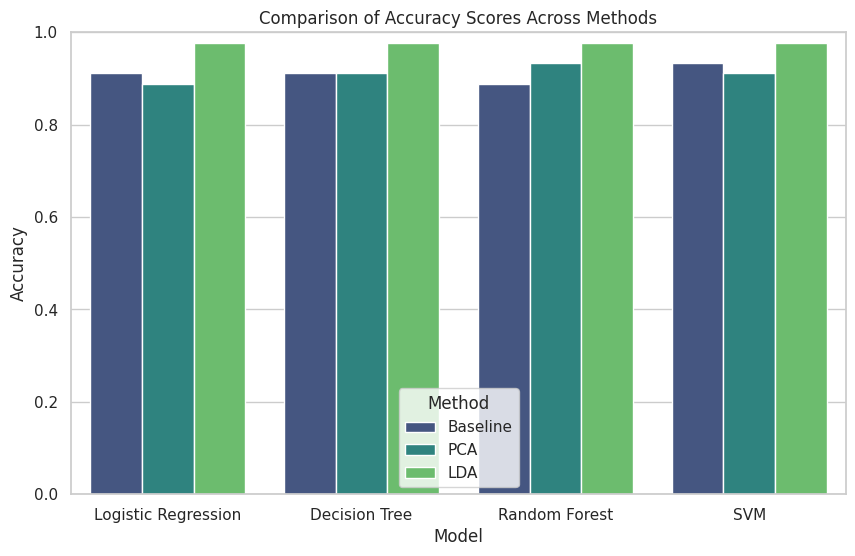

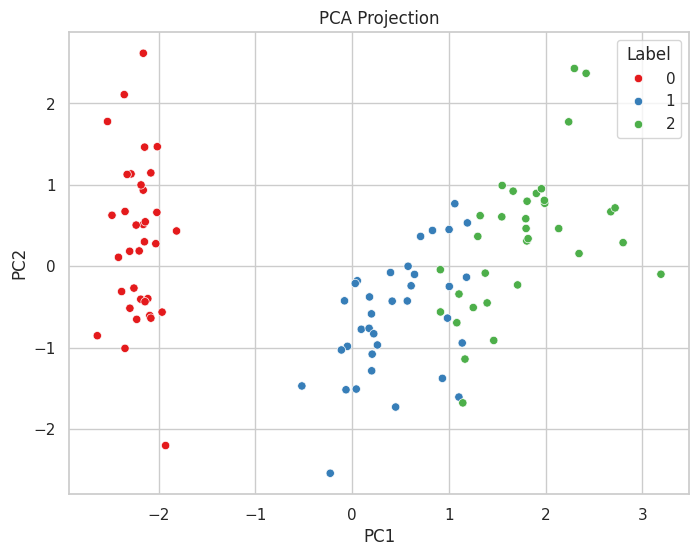

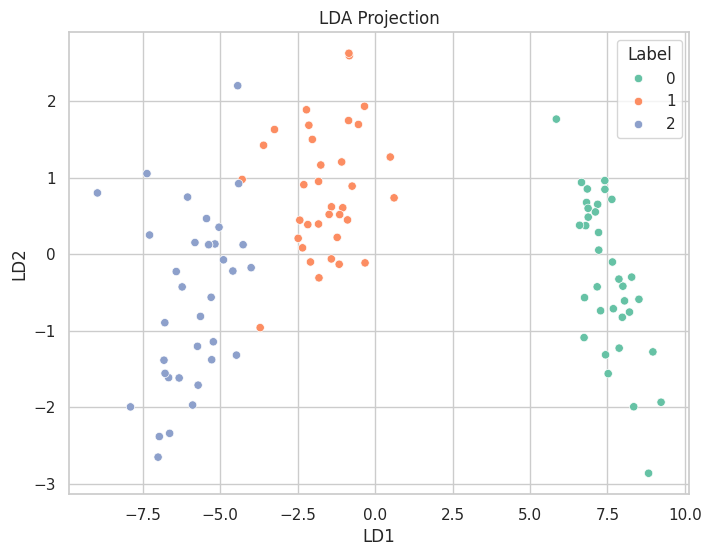

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame summary
accuracy_summary = pd.DataFrame({
    'Baseline': {name: res[0] for name, res in results_baseline.items()},
    'PCA': {name: res[0] for name, res in results_pca.items()},
    'LDA': {name: res[0] for name, res in results_lda.items()}
})

print("### Accuracy Summary ###")
display(accuracy_summary.round(3))

accuracy_melted = accuracy_summary.reset_index().melt(id_vars="index", var_name="Method", value_name="Accuracy")
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_melted, x="index", y="Accuracy", hue="Method", palette="viridis")
plt.title("Comparison of Accuracy Scores Across Methods")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Visualize PCA Projection
pca_df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])
pca_df["Label"] = y_train
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Label", palette="Set1").set_title("PCA Projection")
plt.show()

# Visualize LDA Projection
lda_df = pd.DataFrame(X_train_lda, columns=["LD1", "LD2"])
lda_df["Label"] = y_train
plt.figure(figsize=(8, 6))
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="Label", palette="Set2").set_title("LDA Projection")
plt.show()


## 6. Observations and Insights

- **Logistic Regression:**  
  - Full feature space generally yields high performance.  
  - PCA may lose some discriminative details, slightly lowering performance.  
  - LDA, with its class-based approach, often maintains or improves performance.

- **Decision Trees and Random Forests:**  
  - These models perform robustly with all features.  
  - Reducing dimensions can oversimplify the data, limiting the ability to capture fine-grained splits.

- **SVM:**  
  - Highly sensitive to the feature space.  
  - PCA may result in less distinct class boundaries, while LDA’s class separability approach helps improve performance.

- **Conclusion:**  
  - PCA focuses solely on variance and may overlook class differences.  
  - LDA leverages label information, often leading to better class separation when data are linearly separable.